# Module 4 Assignment

A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says `# YOUR CODE HERE`. Do not write your answer anywhere else other than where it says `# YOUR CODE HERE`. Anything you write elsewhere will be removed or overwritten by the autograder.
2. Before you submit your assignment, make sure everything runs as expected. Go to the menubar, select Kernel, and restart the kernel and run all cells (Restart & Run all).
3. Do not change the title (i.e. file name) of this notebook.
4. Make sure that you save your work (in the menubar, select File → Save and CheckPoint).
5. All work must be your own, if you do use any code from another source (such as a course notebook or a website) you need to properly cite the source.

-----

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from nose.tools import assert_equal, assert_almost_equal, assert_true, assert_is_instance

-----

## Loading Breast Cancer Data

In this assignment, we will work with a breast cancer data set to make predictive models. Before we build a model, we first load the data into the assignment notebook, and randomly sample several rows. The second Code cell splits the DataFrame into a training and testing data set, respectively, before creating the features and labels to use for our classification task.

-----

In [2]:
# Load data
df = pd.read_csv('./breast-cancer-wisconsin.data')
df.sample(5)

,id,clump thickness,uniformity cell size,uniformity cell shape,marginal adhesion,epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitoses,class
331,826923,1,1,1,1,2,1,1,1,1,2
289,636130,1,1,1,1,2,1,3,1,1,2
511,769612,4,1,1,1,2,1,1,1,1,2
581,1325309,4,1,2,1,2,1,2,1,1,2
539,1313658,3,1,1,1,2,1,1,1,1,2


In [3]:
# Create features and labels

y = df['class']
X = df.drop('class', axis=1)

# Split data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

-----

## Problem 1: Create a Pipeline for Random Forest

For this problem, you must complete the `rf_pipeline` function to create a new pipeline that contains random forest classifier. This classifier should be created by using the `n_estimators` and `rs` parameters.

-----

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

def rf_pipeline(n_estimators, rs):
    """"
    Create a scikit learn pipeline that wraps a random forest classifier
    
    Inputs
    ---------
    n_estimators: the number of estimators used by the random forest
    rs: the random state of the random forest, used for reproducibility
    
    Returns
    -------
    pipeline: an sklearn pipeline object
    """
    
    ### YOUR CODE HERE
    
    pipeline = Pipeline([('rfc', RandomForestClassifier(n_estimators=n_estimators, random_state=rs))])
    
    return pipeline

In [5]:
# Call function to create a pipeline
pl = rf_pipeline(100, 2)

# Test the new pipeline
assert_equal(str(type(pl)), "<class 'sklearn.pipeline.Pipeline'>")
assert_equal(pl.steps[0][1].n_estimators, 100)
assert_equal(pl.steps[0][1].random_state, 2)

-----

## Problem 2: Compute the Average Cross Validation Score

For this problem, you will finish the `rf_avg_crossval` function to compute the average (or mean) cross validation score for a random forest classifier. To perform the cross-validation, you should use the `StratifiedKFold` object within the scikit learn library. Specifically, you must complete the following tasks:

1. Create the `StratifiedKFold` object, using the `n_splits` and `rs` parameters.
2. Create a random forest pipeline, by using your solution to problem one above, and including the `n_estimators` and `rs` parameters.
3. Compute the cross-validation scores for this pipeline, the training data, and the `StratifiedKFold` object.
4. Compute the average cross validation score

-----

In [6]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

def rf_avg_crossval(rfp, X_train, y_train, 
                    n_estimators, n_splits, rs):
    """"
    Inputs
    ---------
    rfp: The rf_pipeline function you created in Problem 1
    X_train: the training data
    y_train: the training data labels
    n_estimators: the number of estimators used by the random forest
    rs: the random state of the random forest and of the cross validation,
        used for reproducibility
    
    Returns
    -------
    mean_score: the average cross validation score of the random forest 
    """
    
    ### YOUR CODE HERE
    
    skf = StratifiedKFold(n_splits=n_splits, random_state=rs, shuffle=False)

    #skf.get_n_splits(X_train, y_train)
    
    rfc = RandomForestClassifier(n_estimators=n_estimators, random_state=rs)
    
    cv_score = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=skf)
    
    print(cv_score)
    
    mean_score = cv_score.mean()
    
    return mean_score

In [7]:
# Compute mean scores
mean_score = rf_avg_crossval(rf_pipeline, X_train, y_train, 10, 5, 2)

# Test mean scores
assert_almost_equal(mean_score, 0.96236, places=4)

[ 0.95833333  0.96875     0.95833333  0.95833333  0.96808511]


-----

## Problem 3: Random Grid Search

For this problem, you will finish writing the `random_crossval` function, shown below, to complete the following tasks:

1. Create a dictionary to map the `'rf__n_estimators'` key to the `n_estimators_array` value.
1. Create a randomized search cross-validation estimator by using the scikit learn library. Be sure to pass or assign the following parameters when creating this estimator:
  - `pl` random forest pipeline.
  - The dictionary created in step one above assigned to the `param_distributions` parameter.
  - `n_samples` parameter assigned to the `n_iter` parameter.
  - `rs` assigned to the `random_state` parameter.

1. Fit this estimator to the training data.
1. Extract the best values from the randomized grid search as a dictionary.
1. Return the dictionary containing the best parameters.

-----

In [8]:
from sklearn.model_selection import RandomizedSearchCV

def random_crossval(pl, X_train, y_train, n_estimators_array, n_samples, rs):
    """"
    Uses a randomized grid search to determine the best parameters of a 
    specific the specified pipeline on a given test data set.
    
    Inputs
    ---------
    pl: random forest pipeline
    X_train: the training data
    y_train: the trainig data lavels
    n_estimators_array: a numpy array containing possible values for n_estimators
    n_samples: the number of times the random cv will sample from n_estimators_array
    rs: the random state of the random forest and of the cross validation,
        used for reproducibility
    
    Returns
    -------
    best_params: a list of the best parameters from the randomized cross validation
    """
    
    ### YOUR CODE HERE
    
    
    
    params = {'rfc__n_estimators' : n_estimators_array}
    
    rcv = RandomizedSearchCV(estimator=pl, param_distributions=params, n_iter=n_samples, random_state=rs)
    
    rcv.fit(X_train, y_train)
    
    best_params = rcv.best_params_
    
    return best_params

In [9]:
# Perform Grid Search to get best parameters
params_list = random_crossval(pl, X_train, y_train, 
                              np.arange(1,100,1), 10, 2)

# Test grid search results
assert_equal(params_list["rfc__n_estimators"], 31)

-----

## Loading Car Price Data

For the rest of this assignment, we will work with a car price data set to make regressive models between car specifications and car price. Before we build a model, we first load the data into the assignment notebook, and randomly sample several rows. The second Code cell selects only numeric columns to simplify the analysis, and displays the first few instances.

-----

In [10]:
df = pd.read_csv('./imports-85.data')
df.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,'engine-location',wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio',horsepower,peak-rpm,city-mpg,highway,price
95,1,128,12,1,std,2.0,3,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7799.0
74,1,122,9,1,std,2.0,0,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0
194,-2,103,21,1,std,4.0,2,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940.0
124,3,122,14,1,turbo,2.0,3,rwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145,5000,19,24,12764.0
12,0,188,2,1,std,2.0,2,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970.0


In [11]:
df_simple = df[df.columns[df.dtypes!=object]]
df_simple.head()

,symboling,normalized-losses,make,fuel-type,num-of-doors,body-style,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio',city-mpg,highway,price
0,3,122,0,1,2.0,4,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,13495.0
1,3,122,0,1,2.0,4,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500.0
2,1,122,0,1,2.0,3,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,16500.0
3,2,164,1,1,4.0,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950.0
4,2,164,1,1,4.0,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,17450.0


-----

With the numeric data, we can now create our independent and dependent variables so that we can 
build a model that can predict the price of the car. After this is done, we split these data into a training and testing set.

-----

In [12]:
X = df_simple.drop("price", axis=1)
y = np.ravel(df_simple["price"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

-----

## Problem 4:  Ridge Regression

For this problem, you must finish writing the `ridge_r` function by completing the following tasks:
1. Create a [`Ridge Regression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) model by using the scikit learn library. Be sure to
  - Set the `alpha` hyperparameter for the `RidgeRegression` model to the `alpha` function parameter.
  - Set the `random_state` parameter for the `RidgeRegression` model to the `rs` function parameter.
  
1. Fit the `RidgeRegression` model by using the training features and labels.
1. Compute the $R^2$ coefficient using the testing features and labels.
1. Return the $R^2$ coefficient.

-----

In [15]:
from sklearn.linear_model import Ridge

def ridge_r(X_train, y_train, X_test, y_test, alpha=1, rs=0):
    """"
    Fit a ridge regression model to the training data and 
    compute and return the R2 score for the test data.
    
    Inputs
    ---------
    X_train: Pandas DataFrame containing features for training dataset
    y_train: Pandas DataFrame containing labels for training dataset
    X_test: Pandas DataFrame containing features for testing dataset
    y_test: Pandas DataFrame containing labels for testing dataset
    alpha: a regularization parameter
    rs: random state for random number generator
    
    Returns
    -------
    score: the coefficient of determination as a floating point value
    """
    
    ### YOUR CODE HERE
    
    rs = Ridge(alpha=alpha, random_state=rs)
    
    rs.fit(X_train, y_train)
    
    score = rs.score(X_test, y_test)
    
    return score

In [16]:
import helper

# Compute scores as a function of alpha
alphas = np.arange(0.1, 250, 1)
scores = []
for alpha in alphas:
    score = ridge_r(X_train, y_train, X_test, y_test, alpha=alpha)
    scores.append(score)

# Compare scores to precomputed values
for ans, sol in zip(scores, helper.rr_sol):
    assert_almost_equal(ans, sol, places=2)

-----

If you plot your ridge regression scores against alpha they should look similar to this plot: 

![ridgeR2.png](ridgeR2.png)

Notice how the r2 score increases as alpha increases. 

*If you are failing the previous assert statement, try running the cell below to help you debug the `ridge_r` function.*

-----

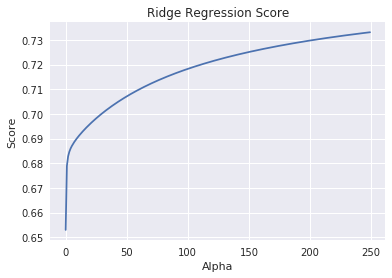

In [17]:
# Plot the score as a function of alpha
sns.set()
fig, ax = plt.subplots()
ax.plot(alphas, scores)
ax.set(title='Ridge Regression Score',
       xlabel='Alpha',
       ylabel='Score')

sns.despine()

**&copy; 2017: Robert J. Brunner at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode 